# Example code usinf shimoku SDK
This Jupyter notebook was run using Windows subsystem for Linux sice there were some dependencies for shimoku_api_python that could not be installed on Windows directly.

In [1]:
from os import getenv
import shimoku_api_python as Shimoku

/home/aldo/.local/lib/python3.10/site-packages/pydantic/_migration.py:288: UserWarning: `pydantic.utils:lenient_issubclass` has been removed. We are importing from `pydantic.v1.utils:lenient_issubclass` instead.See the migration guide for more details: https://docs.pydantic.dev/latest/migration/
  warnings.warn(
/home/aldo/.local/lib/python3.10/site-packages/pydantic/_migration.py:288: UserWarning: `pydantic.utils:smart_deepcopy` has been removed. We are importing from `pydantic.v1.utils:smart_deepcopy` instead.See the migration guide for more details: https://docs.pydantic.dev/latest/migration/
  warnings.warn(


In [2]:
# using the values directly insead of system variables
access_token = "ae095c1d-4620-44d6-9314-9752db105df3"      #getenv('SHIMOKU_TOKEN')
universe_id: str = "0d2e9d92-7f6a-44d6-9542-ef642f264bfc"  #getenv('UNIVERSE_ID')
workspace_id: str = "2af107a6-6e0d-4a07-aaff-9240a13ece3e" #getenv('WORKSPACE_ID')

s = Shimoku.Client(
    access_token=access_token,
    universe_id=universe_id,
)
s.set_workspace(uuid=workspace_id)



In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np


In [4]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 12

## Data from Githhub using pandas
The data consists of a bunch of scores (points) assigned to several brands of coffee from diffrent countries, and also include some features like flavour, altitude color etc

In [5]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv"
df = pd.read_csv(url, sep=",", on_bad_lines="skip") # some badlines are skipped

In [6]:
print(df.shape)
df[df.columns].head()

(1339, 43)


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [7]:
df["processing_method"].unique()

array(['Washed / Wet', nan, 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

In [8]:
mean_score_by_country = df.groupby(by="country_of_origin")[["total_cup_points", "acidity"]].mean()

### Analyzing the total scores by averaging the participants for countries

<AxesSubplot:xlabel='country_of_origin'>

<Figure size 864x432 with 0 Axes>

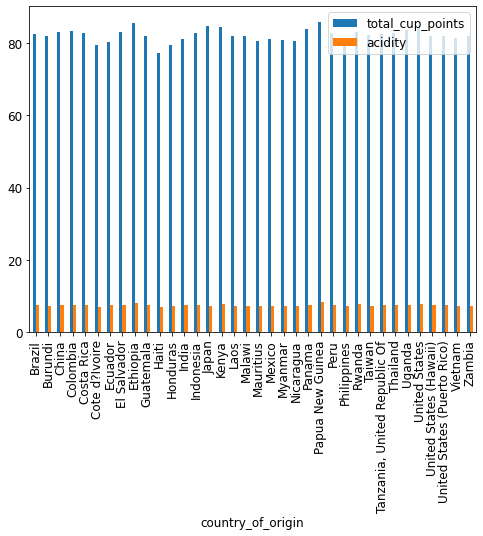

In [9]:
ffig = plt.figure(figsize=(12,6))
mean_score_by_country.plot(kind="bar")


In [10]:
# sorting descendent way
mean_score_by_country.sort_values(by="total_cup_points",axis=0, ascending=False, inplace=True )

<AxesSubplot:xlabel='country_of_origin'>

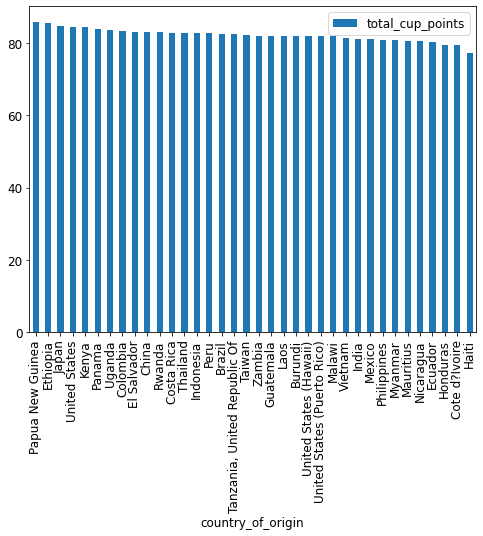

In [11]:
mean_score_by_country.plot(y="total_cup_points", kind="bar")#,logy=True)

In [12]:
df.columns

Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [13]:
mean_score_flavor = df.groupby(by="country_of_origin")[["total_cup_points", "flavor", "acidity"]].mean()
mean_score_flavor.sort_values(by="total_cup_points",axis=0, ascending=False, inplace=True )

,total_cup_points,flavor,acidity
country_of_origin,,,
Papua New Guinea,85.750000,8.420000,8.330000
Ethiopia,85.484091,8.009091,8.043636
Japan,84.670000,7.750000,7.420000
United States,84.433000,7.992000,7.935000
Kenya,84.309600,7.782400,7.866000


<Figure size 864x432 with 0 Axes>

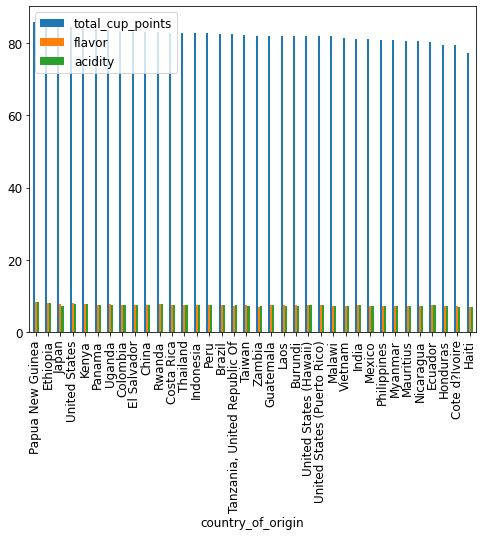

In [14]:
fig = plt.figure(figsize=(12,6))
mean_score_flavor.plot(y=["total_cup_points", "flavor", "acidity"], kind="bar")
mean_score_flavor.head()

### Removing outliers

<AxesSubplot:xlabel='total_cup_points', ylabel='altitude_mean_meters'>

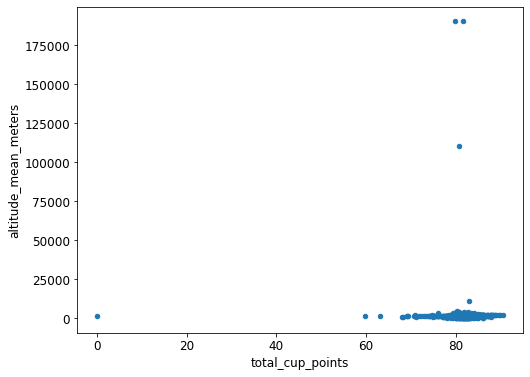

In [15]:
df.plot(x="total_cup_points", y="altitude_mean_meters", kind="scatter")
#plt.ylim(0,10000)

In [16]:
df_clean = df[(df["altitude_mean_meters"] < 10000) & (df["total_cup_points"] > 0)]


### Correlation between score and mean altitude

Text(0, 0.5, 'Flavor')

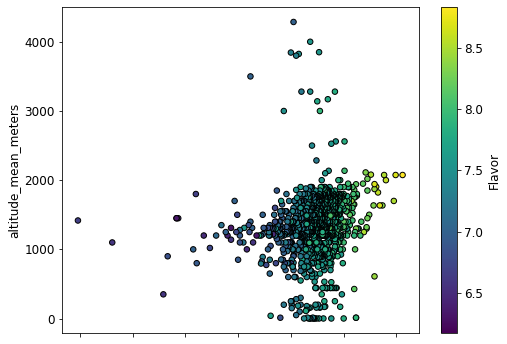

In [17]:
df_clean.plot(x="total_cup_points", y="altitude_mean_meters", c=df_clean["flavor"],kind="scatter", linewidth=1, edgecolor="k", s=30, colorbar=True)
ax = plt.gcf()
ax.get_axes()[1].set_ylabel("Flavor")

#### Grouping by country

In [18]:
df_clean_country_mean = df.groupby(by="country_of_origin",as_index=False)[["total_cup_points", "acidity","flavor", "altitude_mean_meters"]].mean()

In [27]:
df_clean_country_mean

,country_of_origin,total_cup_points,acidity,flavor,altitude_mean_meters
0,Brazil,82.405909,7.511439,7.573561,1016.771429
1,Burundi,81.830000,7.415000,7.460000,1790.000000
2,China,82.927500,7.578125,7.625625,1463.125000
3,Colombia,83.106557,7.560000,7.597104,1585.640000
4,Costa Rica,82.789020,7.573922,7.537255,1380.134783
5,Cote d?Ivoire,79.330000,7.000000,7.250000,200.000000
6,Ecuador,80.220000,7.693333,7.640000,420.000000
7,El Salvador,83.052857,7.590476,7.654286,1333.157895
8,Ethiopia,85.484091,8.043636,8.009091,1800.300667
9,Guatemala,81.846575,7.596409,7.489006,3860.261492


##### Direct relation between total points and the flavour score

<AxesSubplot:xlabel='flavor', ylabel='total_cup_points'>

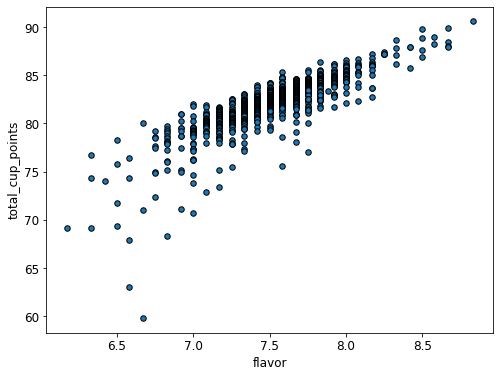

In [20]:
df_clean.plot(y="total_cup_points", x="flavor", kind="scatter", linewidth=1, edgecolor="k", s=30)


#### Brands per country

<AxesSubplot:xlabel='country_of_origin'>

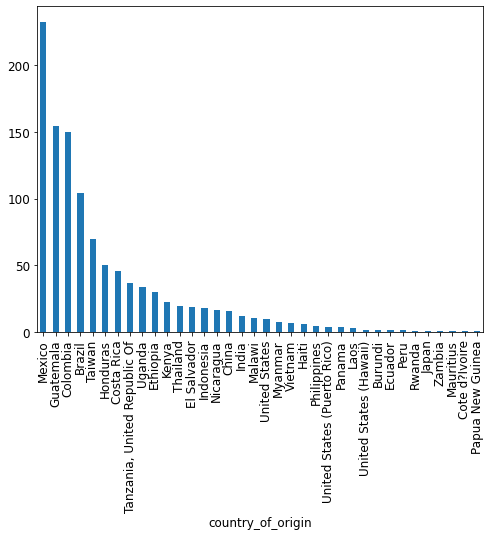

In [21]:
country_participations =df_clean["country_of_origin"].value_counts()
country_participations.plot(kind = "bar")

In [22]:
country_participations = pd.DataFrame(country_participations).reset_index()
country_participations.head()

,country_of_origin,count
0,Mexico,232
1,Guatemala,154
2,Colombia,150
3,Brazil,104
4,Taiwan,70


In [23]:
df_peru = df_clean[df_clean["country_of_origin"]=="Peru"]
df_peru

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1200,79.0,Arabica,sustainable harvest coffee,Peru,NaN,NaN,NaN,030-0582-0050,sustainable harvest,1400,...,NaN,4,"January 8th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1400.0,1400.0,1400.0
1259,77.0,Arabica,andrew bowman,Peru,"producer group (approx. 1,000 farmers)",NaN,NaN,30,"tony's coffee and teas, inc.",900-1500 masl,...,Green,9,"June 15th, 2016",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,900.0,1500.0,1200.0


#### Loading to Shimoku dashboard

In [33]:
# coffee board
s.set_board('Coffee Rank Board')

s.set_menu_path('catalog', 'bar-example')
s.plt.bar(
    data=df_clean_country_mean[['country_of_origin','acidity', "flavor"]],
    y=['acidity', "flavor"],
    order=0, title='Acidity and flavor by country',
     x='country_of_origin',
    y_axis_name="Grade",
    x_axis_name="Country"
)
s.pop_out_of_menu_path()

# catalog of 

# points by country
s.set_menu_path('catalog', 'Scores')
s.plt.bar(
    data=df_clean_country_mean.sort_values(by="total_cup_points", ascending=False),
    y=['total_cup_points'],
    order=0, title='Mean points by coutry',
     x='country_of_origin',
    y_axis_name="Total points",
    x_axis_name="Country"
)

# number of participants by country
s.set_menu_path('catalog', 'Participats by country')
s.plt.bar(
        data=country_participations[["count","country_of_origin"]], y="count",x=["country_of_origin"],
        x_axis_name='Number of participants',
        order=0, show_values=["count"]
    )


# flavour influence in total points
# correlation
s.set_menu_path('catalog', 'Flavour predominance in total points')
s.plt.scatter(
    point_fields=[( "flavor" ,"total_cup_points")],
    data=df_clean[["total_cup_points", "flavor"]],
    order=0, title='Flavour predominance in total points',
     
    x_axis_name="Flavor",
    y_axis_name="Total points"

)

# correlation between the altitude and  flavour
s.set_menu_path('catalog', 'Correlation: Flavour-Altitude')
s.plt.scatter(
    point_fields=[("altitude_mean_meters",'flavor')],
    data=df_clean[["altitude_mean_meters",'flavor']],
    order=0, title='Flavor and mean altitude',
    y_axis_name="Flavor",
    x_axis_name="Mean altitude (m)"
)



In [30]:
df_clean[['acidity', "flavor"]]

,acidity,flavor
0,8.75,8.83
1,8.58,8.67
2,8.42,8.50
3,8.42,8.58
4,8.50,8.50
...,...,...
1331,7.33,7.67
1332,7.83,7.42
1333,7.42,7.50
1335,7.75,7.67
